# Euler Scheme and Analytical Solution Comparison

We compute numerical solutions to the 1-dimensional heat equation using the explicit forward Euler scheme and compare the numerical solutions with the analytic solution.

In [1]:
from util_funcs import analytic_sol
from HeatEqSolver import HeatEqSolver
from HeatEqNN import HeatEqNN

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import mean_squared_error as mse

from plotting import set_plot_params

2025-12-18 16:50:43.319941: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-18 16:50:43.369834: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-18 16:50:44.384454: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


We will compare solutions for $t = 0.2$ and $t = 1$.


### Anlalytical solution
The analytical solution is given by
$$ e^{-\pi^2t}\sin(\pi x) $$

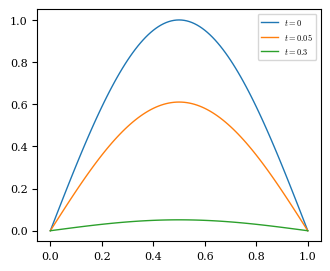

In [2]:
set_plot_params()

x10 = np.linspace(0, 1, 11)
x100 = np.linspace(0,1,101)

ts_plot = [0, 0.05, 0.3]

x100_grid, t_grid = np.meshgrid(x100, ts_plot)
x10_grid, t_grid10 = np.meshgrid(x10, ts_plot)

points = np.vstack([x100, t_grid[0]])
a_sol_init = analytic_sol(points)


points = np.vstack([x100, t_grid[1]])
a_sol_t1 = analytic_sol(points)

points = np.vstack([x100, t_grid[2]])
a_sol_t2 = analytic_sol(points)


points = np.vstack([x10, t_grid10[1]])
a_sol10_t1 = analytic_sol(points)

points = np.vstack([x10, t_grid10[2]])
a_sol10_t2 = analytic_sol(points)


plt.plot(x100, a_sol_init, label = r"$t=0$")

plt.plot(x100, a_sol_t1, label = r"$t=0.05$")

plt.plot(x100, a_sol_t2, label = r"$t=0.3$")

plt.legend()
plt.show()

### Euler Scheme Solution:
We will consider solutions for $\Delta x = 1/10$ and $1/100$. As we require $\Delta t / \Delta x^2 \leq 1/2$ for then we will use the largest $\Delta t$ possible:
$\Delta t = 1/200$ and $\Delta t = 1/20000$ respectively.

In [3]:
def initial_state(x):
    return np.sin(np.pi*x)

initial_state_x10 = initial_state(x10)
initial_state_x100 = initial_state(x100)

space_step10 = 0.1
time_step10  = 0.001

space_step100 = 0.01
time_step100  = 0.00001

duration = ts_plot[2]

euler_solver10 = HeatEqSolver(initial_state_x10, space_step10,
                              time_step10, duration)
euler_solver100 = HeatEqSolver(initial_state_x100, space_step100,
                              time_step100, duration)

euler_sol10 = euler_solver10.solve()
euler_sol100 = euler_solver100.solve()

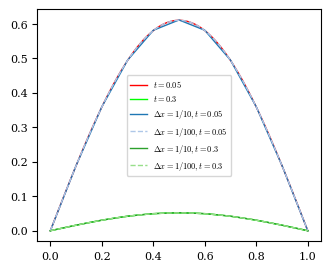

In [4]:
euler10_1t_i = round(ts_plot[1]/time_step10)
euler100_1t_i = round(ts_plot[1]/time_step100)

euler10_2t_i = round(ts_plot[2]/time_step10)
euler100_2t_i = round(ts_plot[2]/time_step100)

euler_10_1t = euler_sol10[euler10_1t_i]
euler_100_1t = euler_sol100[euler100_1t_i]

euler_10_2t = euler_sol10[euler10_2t_i]
euler_100_2t = euler_sol100[euler100_2t_i]

set_plot_params()

colors = mpl.color_sequences["tab20"]

plt.plot(x100, a_sol_t1, color = "r", label = r"$t=0.05$")
plt.plot(x100, a_sol_t2, color = (0,1,0), label = r"$t=0.3$")

plt.plot(x10, euler_10_1t, label = r"$\Delta x = 1/10, t=0.05$",
         color = colors[0])
plt.plot(x100, euler_100_1t, linestyle="--", 
         label = r"$\Delta x = 1/100, t=0.05$", color = colors[1])

plt.plot(x10, euler_10_2t, label = r"$\Delta x = 1/10, t=0.3$",
        color  = colors[4])
plt.plot(x100, euler_100_2t, linestyle="--", 
         label = r"$\Delta x = 1/100, t=0.3$", color = colors[5])
plt.legend()
plt.show()

In [6]:
MSE_10_t1 = mse(a_sol10_t1, euler_10_1t)
MSE_10_t2 = mse(a_sol10_t2, euler_10_2t)

MSE_100_t1 = mse(a_sol_t1, euler_100_1t)
MSE_100_t2 = mse(a_sol_t2, euler_100_2t)

print("step = 1/10,  t=0.05 MSE: ", MSE_10_t1)
print("step = 1/100, t=0.05 MSE: ", MSE_100_t1)
print("step = 1/10,  t=0.30 MSE: ", MSE_10_t2)
print("step = 1/100, t=0.30 MSE: ", MSE_100_t2)
print("step= 1/10,   both t: ", (MSE_10_t1 + MSE_10_t2)/2)
print("step = 1/100, both t: ", (MSE_100_t1 + MSE_100_t2)/2)

step = 1/10,  t=0.05 MSE:  4.531587229673036e-07
step = 1/100, t=0.05 MSE:  4.8638240167727967e-11
step = 1/10,  t=0.30 MSE:  1.1828983302003417e-07
step = 1/100, t=0.30 MSE:  1.2593842133199529e-11
step= 1/10,   both t:  2.857242779936689e-07
step = 1/100, both t:  3.061604115046375e-11
